<a href="https://colab.research.google.com/github/Sai25Hajime/CognifyZTech_Level2_Task3/blob/main/CognifyZTech_Level2_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the Google Drive

First we mount the google drive since that is where the dataset will be stored.

In [10]:
#Both are used to import the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

Importing libraries is standard practice when coding or working with datasets. In this case we are importing the Pandas, MatPlotlib and Seaborn libraries. We are also importing the display libraries.

In [11]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

Now we load the dataset. Since we have uploaded it from Google Drive. We need to put that path instead of the local path.

In [12]:
# Load the dataset
file_path = "/content/drive/MyDrive/Datasets/cognifyz_dataset.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Displaying the Rows

First we will display few rows to get an idea of the dataset.

In [13]:
# Display the first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Extracting Additional Features

Now we start extracting the features from the dataset and creating new features.

In [14]:
### 1. Extracting Additional Features ###
# Creating a feature for the length of the restaurant name
df['restaurant_name_length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))

# Creating a feature for the length of the restaurant address
df['address_length'] = df['Address'].apply(lambda x: len(str(x)))

# Encoding Categorical Variables

Now we encode the variables of Table booking and Online delivery from string values to boolean values.

In [15]:
### 2. Encoding Categorical Variables ###
# Encoding "Has Table Booking" (Yes → 1, No → 0)
df['Has Table booking'] = df['Has Table booking'].str.lower().map({'yes': 1, 'no': 0})

# Encoding "Has Online Delivery" (Yes → 1, No → 0)
df['Has Online delivery'] = df['Has Online delivery'].str.lower().map({'yes': 1, 'no': 0})



# Displaying the updated DataFrame.

Now we are displaying the updated DataFrame.

In [16]:
# Display updated DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,restaurant_name_length,address_length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,0,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,0,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,0,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,0,No,No,4,4.8,Dark Green,Excellent,229,11,64


# Feature Correlation

Lastly, we correlate these features and display them using Seaborn Heatmap.

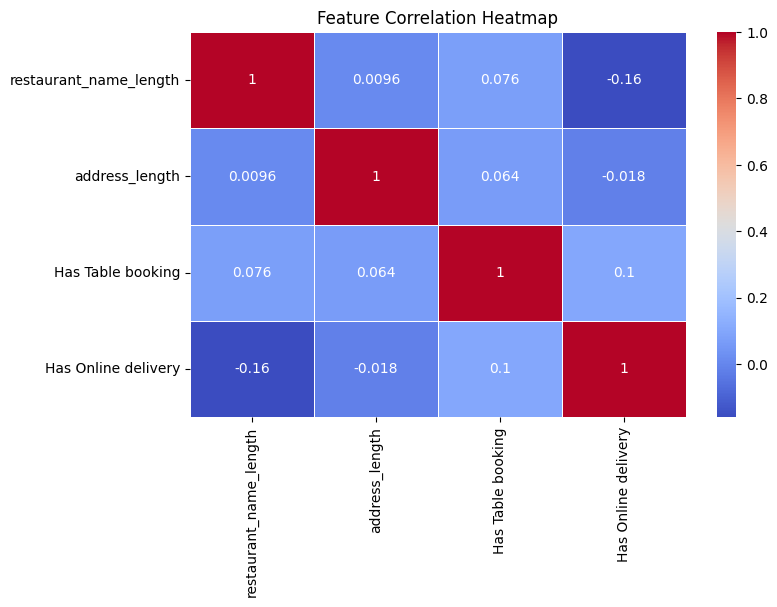

In [17]:
### 3. Checking Feature Correlation ###
plt.figure(figsize=(8, 5))
sns.heatmap(df[['restaurant_name_length', 'address_length', 'Has Table booking', 'Has Online delivery']].corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()